# program test for numerical solution

### - hello, world

In [14]:
print("hello,world")

hello,world


### - Fizz Buzz

In [16]:
for i in range(32):
    if i % 3 == 0 and i % 5 == 0:
        print("FizzBuzz")
    elif i % 3 == 0:
        print("Fizz");
    elif i % 5 == 0:
        print("Buzz")
    else:
        print(i)

FizzBuzz
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31


### - Euler method

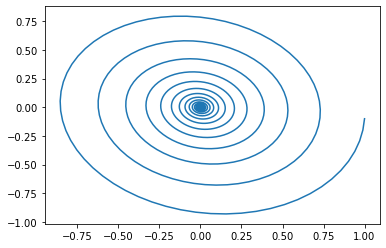

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

t = 0
x = 1
v = 0
dt = 0.1
k = 1
m = 1
gamma = 0.2
p1 = []
p2 = []
for n in range(5000):
    dx = dt * v
    dv = dt * ((-k*x-gamma*v)/m)
    t = t + dt
    x = x + dx
    v = v + dv
    p1.append(x)
    p2.append(v)
plt.plot(p1,p2)
plt.show()

### - Runge-Kutta method

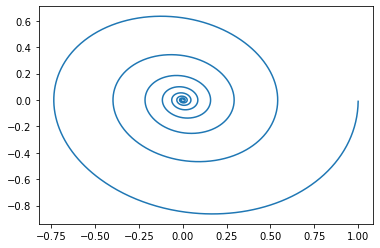

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

def rk_v(t, x, v):
    return v

def rk_a(t, x, v):
    k = 1
    m = 1
    gamma = 0.2
    return((-k*x-gamma*v)/m)

def main():
    t = 0
    x = 1
    v = 0
    dt = 0.01
    kx = [0,0,0,0]
    kv = [0,0,0,0]
    p1 = []
    p2 = []
    for n in range(5000):
        kx[0] = dt * rk_v(t, x, v)
        kx[1] = dt * rk_v(t+dt/2, x+kx[0]/2, v+kv[0]/2)
        kx[2] = dt * rk_v(t+dt/2, x+kx[1]/2, v+kv[1]/2)
        kx[3] = dt * rk_v(t+dt,   x+kx[2],   v+kv[2])
        kv[0] = dt * rk_a(t, x, v)
        kv[1] = dt * rk_a(t+dt/2, x+kv[0]/2, v+kv[0]/2)
        kv[2] = dt * rk_a(t+dt/2, x+kv[1]/2, v+kv[1]/2)
        kv[3] = dt * rk_a(t+dt,   x+kv[2],   v+kv[2])
        dx = (kx[0] + 2*(kx[1]+kx[2]) + kx[3])/6
        dv = (kv[0] + 2*(kv[1]+kv[2]) + kv[3])/6
        t = t + dt
        x = x + dx
        v = v + dv
        p1.append(x)
        p2.append(v)
    plt.plot(p1,p2)
    plt.show()
        
if __name__ == '__main__':
    main()

### - Lorentz Atrractor

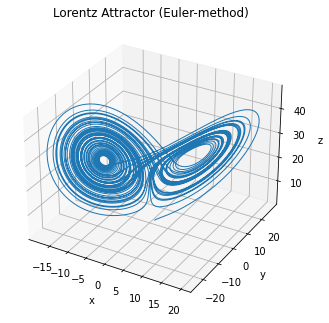

In [19]:
%matplotlib inline
import sys
import traceback
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class LorentzAttractorEuler:
    dt = 1e-3
    n = 50000
    x_0, y_0, z_0 = 1, 1, 1

    def __init__(self):
        self.rslt = [ [], [], [] ]

    def exec(self):
        try:
            xyz = [ self.x_0, self.y_0, self.z_0 ]
            for _ in range(self.n):
                df_dt = self.__lorentz(xyz)
                for i in range(3):
                    xyz[i] = xyz[i] + self.dt * df_dt[i]
                    self.rslt[i].append(xyz[i])
            self.__plot()
        except Exception as e:
            raise

    def __lorentz(self, xyz, p=10, r=28, b=8/3.0):
        try:
            return [
                -p * (xyz[0] - xyz[1]),
                -xyz[0] * xyz[2] + r * xyz[0] - xyz[1],
                xyz[0] * xyz[1] - b * xyz[2]
            ]
        except Exception as e:
            raise

    def __plot(self):
        try:
            fig = plt.figure()
            ax = Axes3D(fig)
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("z")
            ax.set_title("Lorentz Attractor (Euler-method)")
            ax.plot(self.rslt[0], self.rslt[1], self.rslt[2], lw=1)
            plt.show()
            #plt.savefig("out0.png")
        except Exception as e:
            raise

if __name__ == "__main__":
    try:
        obj = LorentzAttractorEuler()
        obj.exec()
    except Exception as e:
        traceback.print_exc()
        sys.exit(1)